<a href="https://colab.research.google.com/github/EmilioBorges/Projeto-Airbnb/blob/main/Analise_de_Dados_Airbnb_da_Cidade_de_Nova_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O Airbnb atualmente e a maior rede de hotelaria do mundo sem possuir qualquer tipo de imovel

## Obtenção dos Dados

Todos os dados utilizados neste projeto foram obtidos a partir do [Inside Airbnb](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv) da cidade de Nova York . Detalhe que esta é a versão resumida do dataset, disponibilizada pelo próprio portal.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - grupo por bairro
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

In [1]:
# instalando algumas ferramentas necessárias
!pip install pywaffle -q

     |████████████████████████████████| 565 kB 25.8 MB/s 


In [2]:
# importando as bibliotecas necessarias
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium
from folium import plugins
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from pywaffle import Waffle
from scipy import stats
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from PIL import Image
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [3]:
# Importar o arquivo listings.csv para um Dataframe
airbnb_url = 'https://raw.githubusercontent.com/ManarOmar/New-York-Airbnb-2019/master/AB_NYC_2019.csv'
airbnb_ori = pd.read_csv(airbnb_url)

In [4]:
airbnb_ori.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### **Q1- Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui e quais sao os seus tipos?**

In [5]:
# Mostrar a quantidade de dados do Dataframe
print(f'Numero de linhas: {airbnb_ori.shape[0]}')
print(f'Numero de colunas: {airbnb_ori.shape[1]}')

# Mostrar os tipos de dados
display(airbnb_ori.dtypes)

Numero de linhas: 48895
Numero de colunas: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Com isso podemos perceber que temos um total de 48.895 linhas e 16 colunas e temos variaveis do tipo inteiro, objeto e float.

### **Q2- Qual a porcentagem de valores nulos no Dataset?**

In [6]:
# Ordernar de os tipos de colunas de forma decrescente pela porcentagem de valores nulos.
(airbnb_ori.isnull().sum() / airbnb_ori.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.205583
last_review                       0.205583
host_name                         0.000429
name                              0.000327
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Percebemos que algumas colunas possuem mais de 20% de valores nulos e algumas com valores muito baixo.

### **Q3- Como esta a distribuição das variáveis?**

Para verificar a distribuição, vamos plotar o histograma das variaveis.

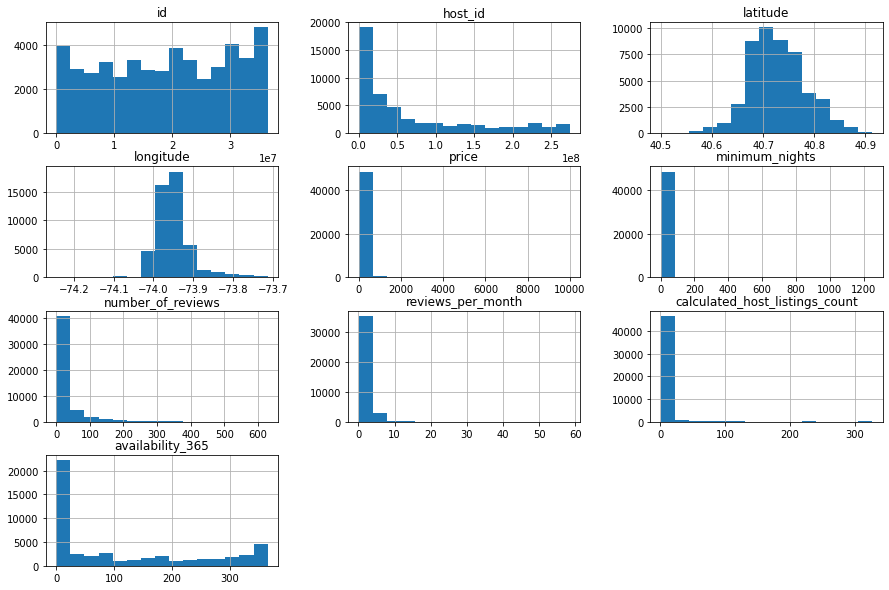

In [7]:
# plotaremos o histograma das variaveis numéricas
airbnb_ori.hist(bins=15, figsize=(15,10))
plt.show()

Analisando as distribuições podemos concluir que temos variaveis com valores bem distribuidos e outras com valores e outras com valores unicos indicando possiveis outliers, e para confirmar vamos realizar uma análise estatistica descritiva das variáveis plotando seus respectivos boxplots.

### **Q4- Temos outliers?**

In [8]:
airbnb_ori.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Com a tabela que foi plotada e possivel confirmar que temos outliers analisando por exemplo a tabela price onde 75% dos valores estão por volta de $175 e o preço maximo $10000, na tabelas minimum_nights podemos verificar tambem que o valor que representa 75% e igual a 5 e o maximo e 1250. Agora vamos plotar o boxplot dessas duas variaveis para visualizar melhor nossos outliers.

**Boxplot da variavel minimum_bights**

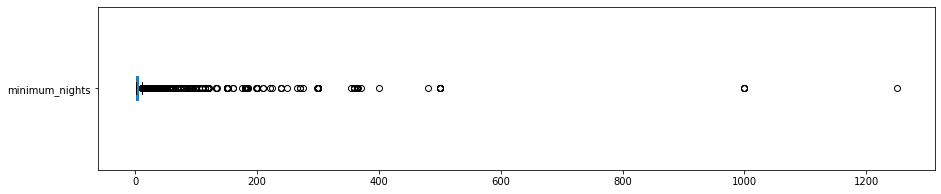

In [9]:
airbnb_ori.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

**Boxplot da variavel minimum_bights**

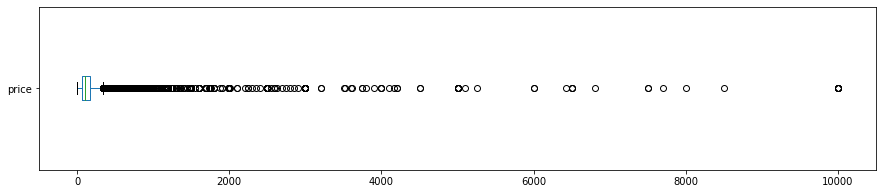

In [10]:
airbnb_ori.price.plot(kind='box', vert=False, figsize=(15,3))

Com os 2 boxplots e possivel identificar a quantidade de outliers que temos nas duas variveis. Agora iremos tratar nos outliers e remover as colunas e os valores nulos.

**vamos dropas as colunas last_review e reviews_per_month**

In [11]:
airbnb_ori.drop(['last_review','reviews_per_month'], axis=1, inplace=True)

**Agora vamos remover os dados nulos das colunas**

In [12]:
airbnb_ori.dropna(axis=0, inplace=True)

In [13]:
airbnb_ori.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Podemos ver que agora nossa dataset esta sem dados nulos.

#### **Agora iremos tratar nossos outliers, vamos utilizar 2 metodos por IQR e tambem pelo z-score**

**Primeiro vamos criar uma copia do arquivo original**

In [14]:
airbnb_IQR = airbnb_ori.copy()

**Remoção Outlier por IQR**

In [15]:
## Remoção Outlier por IQR
def iqr_remove(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  return df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [16]:
airbnb_IQR['price'].shape

(48858,)

In [17]:
airbnb_IQR = iqr_remove(airbnb_IQR, 'minimum_nights')
airbnb_IQR = iqr_remove(airbnb_IQR, 'price')

In [18]:
airbnb_IQR[['minimum_nights','price']].shape

(39703, 2)

In [19]:
airbnb_z_score = airbnb_ori.copy()

**Remoção de outlier por Z-score**

In [20]:
## Remoção Z-score
# Z-Score
def z_score_remove(df, col):
  z = np.abs(stats.zscore(df[col]))
  return df[(z < 5)]

In [21]:
airbnb_z_score = z_score_remove(airbnb_z_score, 'price')
airbnb_z_score = z_score_remove(airbnb_z_score, 'minimum_nights')

In [22]:
airbnb_z_score[['minimum_nights','price']].shape

(48519, 2)

**Boxplot depois de utilizar o IQR**

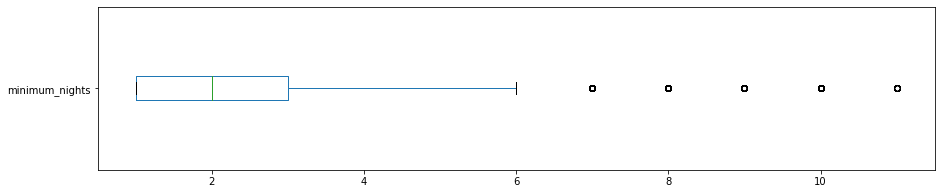

In [23]:
airbnb_IQR.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

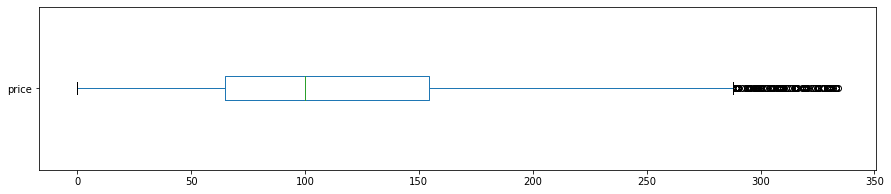

In [24]:
airbnb_IQR.price.plot(kind='box', vert=False, figsize=(15,3))

**Boxplot depois de utilizar o Z-Score**

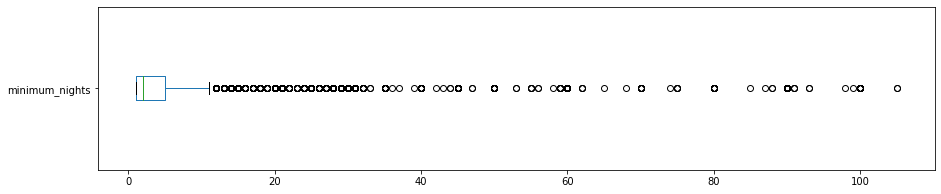

In [25]:
airbnb_z_score.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))

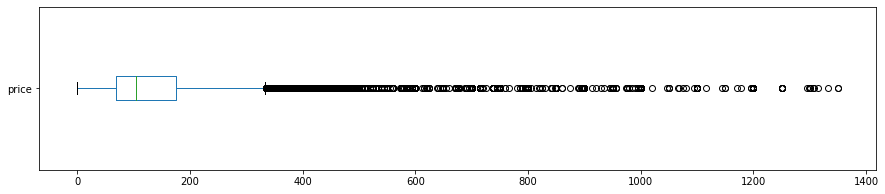

In [26]:
airbnb_z_score.price.plot(kind='box', vert=False, figsize=(15,3))

Com isso podemos concluir que tivemos um melhor tratamento de nossos outliers usando o IQR

### **Q5- Qual e o preço medio dos Alugueis?**

In [27]:
preco_medio = airbnb_IQR['price'].sum()/airbnb_IQR.shape[0]
print(f'O preço medio do aluguel em Dolar e: ${preco_medio:.3f}')
print(f'O preço medio do aluguel em Real e: R${preco_medio * 5.53:.3f}')

O preço medio do aluguel em Dolar e: $119.001
O preço medio do aluguel em Real e: R$658.073


A média dos preços dos aluguies é aproximadamente $119 dolar, o equivalente a R$658 reais

### **Q6- Qual o tipo de imovel mais alugado?**

Na coluna room_type temos a indicação dos tipos de locação disponivel que sao Quarto privado, Casa/Apartamento inteiro ou tambem a opção para dividir o quarto com outras pessoas.

Vamos plotar um grafico para mostrar quais os tipos de quartos mais alugados no airbnb na cidade de Nova York.

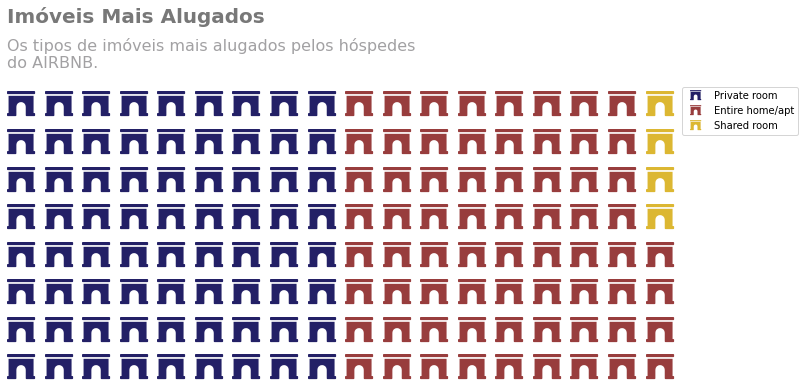

Private room       0.499861
Entire home/apt    0.475229
Shared room        0.024910
Name: room_type, dtype: float64


In [28]:
data = dict(airbnb_IQR['room_type'].value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    figsize=(12,8),
    rows=8,
    columns=18,
    colors=("#232066", "#983D3D", "#DCB732"),
    values=data, icons='archway', icon_size=25,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    icon_legend=True
)

plt.text(0, 1.2, 'Imóveis Mais Alugados',
         fontsize=20, 
         color="#787878",
         weight='bold')

plt.text(0, 1.15,
         "Os tipos de imóveis mais alugados pelos hóspedes\n"
         "do AIRBNB.",
         verticalalignment="top",
         fontsize=16,
         color="#A2A1A3")

fig.set_tight_layout(False)
plt.show();

print((airbnb_IQR['room_type'].value_counts() / airbnb_IQR.shape[0]))

Com isso podemos concluir que aproximadamente 50% opta por um quarto privado seguido de uma casa/apartamento inteiro com aproximadamente 48% e a minoria com nem 1% opta por estar dividindo um quarto.

### **Q7- Qual o valor do aluguel por tipo de acordo com o a localização?**

In [29]:
airbnb_ori_bairro = airbnb_IQR[['room_type','neighbourhood_group','price']]

In [30]:
airbnb_ori_bairro.groupby(['room_type','neighbourhood_group']).agg({'price':'mean'})

price
room_type       neighbourhood_group            
Entire home/apt Bronx                113.853293
                Brooklyn             149.651977
                Manhattan            182.709361
                Queens               132.998922
                Staten Island        121.535032
Private room    Bronx                 61.496764
                Brooklyn              71.558001
                Manhattan            100.511187
                Queens                67.746488
                Staten Island         62.904494
Shared room     Bronx                 46.660714
                Brooklyn              51.475460
                Manhattan             78.318182
                Queens                47.994444
                Staten Island         57.444444

In [31]:
airbnb_ori_bairro.groupby(['room_type','neighbourhood_group']).describe()

price              ...               
                                      count        mean  ...     75%    max
room_type       neighbourhood_group                      ...               
Entire home/apt Bronx                 334.0  113.853293  ...  134.25  325.0
                Brooklyn             7965.0  149.651977  ...  184.00  333.0
                Manhattan            8557.0  182.709361  ...  225.00  334.0
                Queens               1855.0  132.998922  ...  160.00  325.0
                Staten Island         157.0  121.535032  ...  150.00  300.0
Private room    Bronx                 618.0   61.496764  ...   72.50  300.0
                Brooklyn             9043.0   71.558001  ...   82.00  319.0
                Manhattan            7017.0  100.511187  ...  120.00  333.0
                Queens               2990.0   67.746488  ...   79.00  300.0
                Staten Island         178.0   62.904494  ...   78.00  300.0
Shared room     Bronx                  56.0   46.660714  ...   55.00  165.0
                Brooklyn              326.0   51.475460  ...   50.00  300.0
                Manhattan             418.0   78.318182  ...   85.00  320.0
                Queens                180.0   47.994444  ...   52.75  300.0
                Staten Island           9.0   57.444444  ...   75.00  150.0

[15 rows x 8 columns]

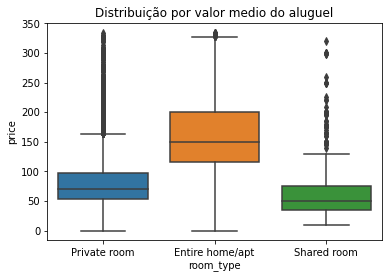

In [32]:
sns.boxplot(x=airbnb_IQR.room_type, y=airbnb_IQR.price)
plt.title('Distribuição por valor medio do aluguel')
plt.show()

Concluimos que os maiores valores sao para as Casas/Apartamento completo, seguido do quarto privado e por ultimo o quarto dividido.

### **Q8- Qual a localidade com os valores mais caros e os mais baratos?**

Anteriormente encontramos os tipos de imoveis mais procurandos para alugar, agora precisamos saber quais são as localidades com os maiores valores e menores, e para isso vamos extrair essas informações do dataset, sendo assim a pessoa podera escolher o melhor lugar de acordo com o valor.

**Bairros mais caros**

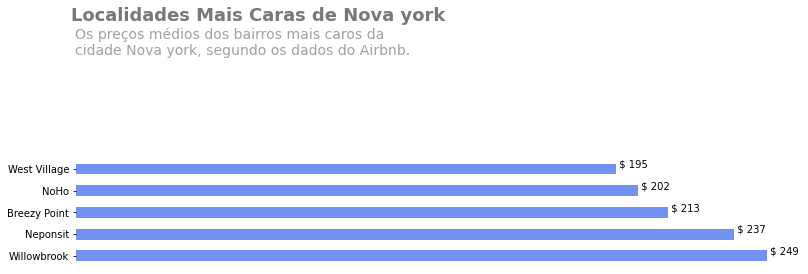

In [33]:
#Definindo cores
CINZA1, CINZA2, CINZA3= "#CFCDCE", "#A2A1A3", "#787878"

# plotando o gráfico
fig, ax = plt.subplots(figsize= (13,2))
n_plots = 5
palette = sns.color_palette("coolwarm", n_colors=n_plots)

with palette:
  # ver preços por bairros, na média
  #ax = airbnb_ori_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[10:].plot.barh(x='lifespan')
  ax = airbnb_IQR.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False).head(5).plot.barh()

  # plotar título
  plt.text(-2, 10.8, 'Localidades Mais Caras de Nova york',
          fontsize=18, 
          color=CINZA3,
          weight='bold')

  # plotar subtitulo
  plt.text(-0.35, 10.5,
          "Os preços médios dos bairros mais caros da\n"
          "cidade Nova york, segundo os dados do Airbnb.",
          verticalalignment="top",
          fontsize=14,
          color=CINZA2)

  initialx=0

  #remover grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  #remover titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 
    
  #adicionar labels
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,' $ {:1.0f}'.format(p.get_width()))
    initialx+=1
  plt.show()

**Bairros mais baratos**

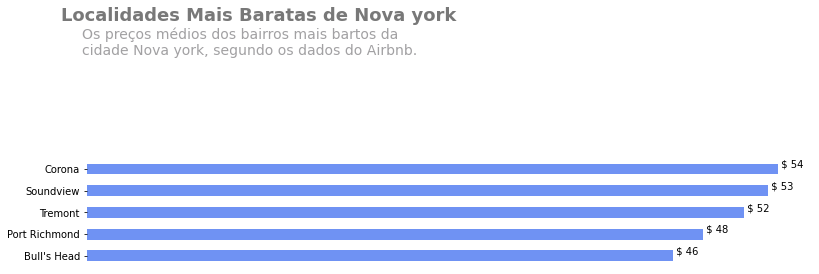

In [34]:
#Definindo cores
CINZA1, CINZA2, CINZA3= "#CFCDCE", "#A2A1A3", "#787878"

# plotando o gráfico
fig, ax = plt.subplots(figsize= (13,2))
n_plots = 5
palette = sns.color_palette("coolwarm", n_colors=n_plots)

with palette:
  # ver preços por bairros, na média
  #ax = airbnb_ori_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[10:].plot.barh(x='lifespan')
  ax = airbnb_IQR.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True).head(5).plot.barh()

  # plotar título
  plt.text(-2, 10.8, 'Localidades Mais Baratas de Nova york',
          fontsize=18, 
          color=CINZA3,
          weight='bold')

  # plotar subtitulo
  plt.text(-0.35, 10.5,
          "Os preços médios dos bairros mais bartos da\n"
          "cidade Nova york, segundo os dados do Airbnb.",
          verticalalignment="top",
          fontsize=14,
          color=CINZA2)

  initialx=0

  #remover grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  #remover titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 
    
  #adicionar labels
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,' $ {:1.0f}'.format(p.get_width()))
    initialx+=1
  plt.show()

Em uma viagem onde a pessoa queira se hospedar em Willowbrook que e o bairro com a media mais alta, ela conseguiria encontrar valores mais em conta nesse bairro?

Para responder a essa questão vamos plotar o boxplot e verificar

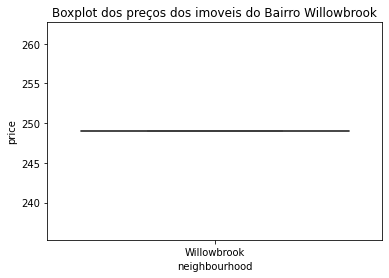

In [35]:
sns.boxplot(x = "neighbourhood", y="price", data=airbnb_IQR.loc[airbnb_IQR['neighbourhood'] == 'Willowbrook'])
plt.title('Boxplot dos preços dos imoveis do Bairro Willowbrook')
plt.show()


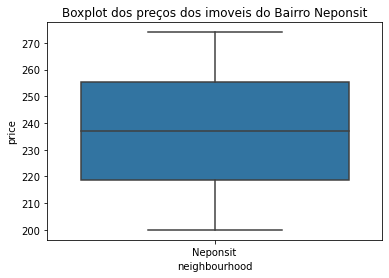

In [36]:
sns.boxplot(x = "neighbourhood", y="price", data=airbnb_IQR.loc[airbnb_IQR['neighbourhood'] == 'Neponsit'])
plt.title('Boxplot dos preços dos imoveis do Bairro Neponsit')
plt.show()

Com o boxplot podemos ver quem e Willowbrook e um bairro sem variação de preço, caso queria um bairro bairro com mais opções de preço Neponsit seria uma boa opção.

Para confirmar vamos usar uma analise de estatistica descritiva

In [37]:
airbnb_IQR['price'].loc[airbnb_IQR['neighbourhood'] == 'Willowbrook'].describe()

count      1.0
mean     249.0
std        NaN
min      249.0
25%      249.0
50%      249.0
75%      249.0
max      249.0
Name: price, dtype: float64

In [38]:
airbnb_IQR['price'].loc[airbnb_IQR['neighbourhood'] == 'Neponsit'].describe()

count      2.000000
mean     237.000000
std       52.325902
min      200.000000
25%      218.500000
50%      237.000000
75%      255.500000
max      274.000000
Name: price, dtype: float64

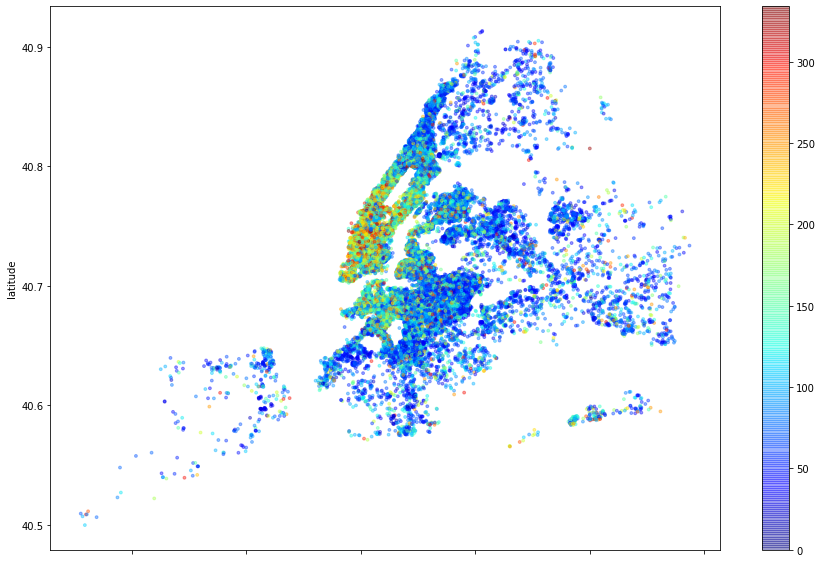

In [39]:
# plotar os imóveis pela latitude-longitude
airbnb_IQR.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=airbnb_IQR['price'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(15,10));

In [40]:
coordernadas=[]
for lat,lng in zip(airbnb_IQR.latitude.values[:18000], airbnb_IQR.longitude.values[:18000]):
    coordernadas.append([lat, lng])

mapa = folium.Map(location=[40.64749,-73.97237], zoom_start=5,tiles='Stamen Toner')

mapa.add_child(plugins.HeatMap(coordernadas))
mapa

Comparando os mapas de calor onde foram comparados os valores e a região onde concentra o maior numero de locações pode se verificar que a regiao com o maior numero de locações esta bem proximo do valor da media do aluguel entre 100 a 250 dolares.

### **Q8- Quais os principais pontos turisticos da cidade de Nova York?**

In [41]:
palavras = pd.read_csv('listings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
palavras.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211102175544,2021-11-03,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,a few days or more,35%,18%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,8.0,8.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1.0,NaN,1 bath,NaN,1.0,"[""Bathtub"", ""Dedicated workspace"", ""Hair dryer...",$150.00,30.0,1125.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0.0,17.0,47.0,322.0,2021-11-03,48.0,0.0,0.0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3.0,3.0,0.0,0.0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211102175544,2021-11-03,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,a few days or more,21%,76%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3.0,NaN,1 bath,1.0,3.0,"[""Microwave"", ""Oven"", ""Pack \u2019n play/Trave...",$73.00,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,NaN,t,4.0,10.0,33.0,220.0,2021-11-03,408.0,38.0,0.0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1.0,1.0,0.0,0.0,4.91
2,5121,https://www.airbnb.com/rooms/5121,20211102175544,2021-11-03,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2.0,NaN,NaN,1.0,1.0,"[""Long term stays allowed"", ""Heating"", ""Wifi

In [43]:
palavras.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              12
                                                ... 
calculated_host_listings_count                     1
calculated_host_listings_count_entire_homes        1
calculated_host_listings_count_private_rooms       1
calculated_host_listings_count_shared_rooms        1
reviews_per_month                               2304
Length: 74, dtype: int64

In [44]:
neighborhood_overview = palavras.dropna(subset=['neighborhood_overview'], axis=0)['neighborhood_overview']

In [45]:
# exemplos de overviews para os bairros do Airbnb
display(neighborhood_overview	.iloc[100])
display(neighborhood_overview	.iloc[120])

'Quintessential brownstones line tree-trimmed sidewalks, Carroll Gardens has established itself as a Brooklyn favorite. Although flush with hip bars, boutiques, and restaurants, it has never lost its old-NYC mystique. Family-oriented with several schools and playgrounds close by.'

"In great New York City neighborhood: Long Island City, Queens! Subway lines E, M, G and 7 are located on same block as apartment - and Midtown Manhattan and Brooklyn are both one quick stop away. Although the apartment is technically in Queens, it is closer to Manhattan's hotspots (Times Square, SoHo, East Village, Lower East Side) than apartments in Manhattan's Upper East Side and Upper West Side."

In [46]:
# concatenar as palavras
all_description = " ".join(s for s in neighborhood_overview	)

print("Quantidade de Palavras: {}".format(len(all_description)))

Quantidade de Palavras: 3178615


In [47]:
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

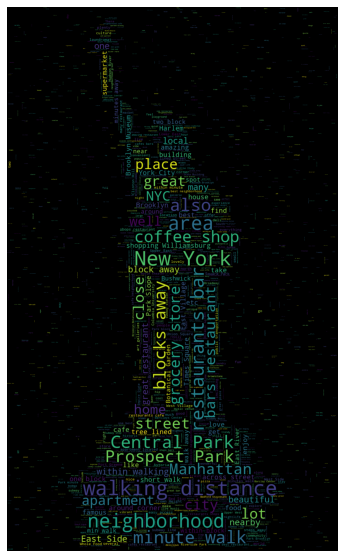

In [48]:
from urllib.request import urlopen
#lista de stopword
stop_words = set(stopwords.words('english'))
stop_words.update(["br"]) #Nosso problema tinham muitos 'br' soltos sem nenhum valor, dessa forma vamos retirá-los.

# endereço da imagem
NY_mask = np.array(Image.open("5.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=NY_mask, max_font_size=600,
                      min_font_size=1).generate(all_description)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

## Com essa arvore usando nuvem de palavras e possivel encontrar alguns dos principais pontos turisticos da cidade de Nova York como por exemplo o Prospect Park no Brooklyn, temos tambem o Central Park, na street Williamsburg no Brooklyn e a area mais badalada da cidade e por fim temos a Estátua da liberdade.

# **Analise com uso de Árvore de Regressão para prever o preço do Aluguel.**

Vamos fazer uma copia do arquivo original para usar na regressão

In [49]:
airbnb_2 = airbnb_IQR.copy()

**Usando o comando dummies criamos novas colunas para neighbourhood_group e room_type onde os dados serão preenchidos com valores 0 e 1 para cada campo.**

In [50]:
airbnb_3 = pd.get_dummies(airbnb_2[['neighbourhood_group','room_type']])

Agora vamos concatenar as colunas que foram criadas com as ja existentes.

In [51]:
airbnb_4 = pd.concat([airbnb_2, airbnb_3], axis=1)

In [52]:
airbnb_4.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0,0,1,0,0,0,1,0


Falta agora remover as colunas extras e as que nao serão usadas no treinamento e no teste.

In [53]:
airbnb_4.drop(columns=['id','host_id','host_name','name','neighbourhood_group','neighbourhood','room_type','latitude','longitude'], inplace=True)

In [54]:
airbnb_4.head(3)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,6,365,0,1,0,0,0,0,1,0
1,225,1,45,2,355,0,0,1,0,0,1,0,0
2,150,3,0,1,365,0,0,1,0,0,0,1,0


In [55]:
x_train, x_test, y_train, y_test = train_test_split(airbnb_4.drop('price', axis=1), airbnb_4['price'], test_size=0.3)

In [56]:
x_train.shape, y_train.shape

((27792, 12), (27792,))

In [57]:
x_test.shape,y_test.shape

((11911, 12), (11911,))

In [58]:
clf = DecisionTreeRegressor(max_depth=12, min_samples_leaf=3, random_state=42)

In [59]:
clf = clf.fit(x_train, y_train)

In [60]:
clf.feature_importances_

array([2.57767475e-02, 5.48704677e-02, 3.29176072e-02, 8.60816315e-02,
       1.29339300e-03, 8.46004452e-03, 1.08479465e-01, 2.09835313e-03,
       2.55686318e-04, 6.73181630e-01, 1.92532424e-03, 4.65964919e-03])

In [61]:
list(zip(airbnb_4.columns,clf.feature_importances_))

[('price', 0.025776747501819467),
 ('minimum_nights', 0.05487046765830917),
 ('number_of_reviews', 0.03291760715455815),
 ('calculated_host_listings_count', 0.08608163152363921),
 ('availability_365', 0.001293392998143406),
 ('neighbourhood_group_Bronx', 0.00846004452436573),
 ('neighbourhood_group_Brooklyn', 0.10847946540583087),
 ('neighbourhood_group_Manhattan', 0.0020983531333956286),
 ('neighbourhood_group_Queens', 0.0002556863183353916),
 ('neighbourhood_group_Staten Island', 0.6731816303512319),
 ('room_type_Entire home/apt', 0.0019253242396662642),
 ('room_type_Private room', 0.004659649190704612)]

In [62]:
for feature, importancia in zip(airbnb_4.drop('price', axis=1).columns,clf.feature_importances_):
    print('{}:{}'.format(feature, importancia))

minimum_nights:0.025776747501819467
number_of_reviews:0.05487046765830917
calculated_host_listings_count:0.03291760715455815
availability_365:0.08608163152363921
neighbourhood_group_Bronx:0.001293392998143406
neighbourhood_group_Brooklyn:0.00846004452436573
neighbourhood_group_Manhattan:0.10847946540583087
neighbourhood_group_Queens:0.0020983531333956286
neighbourhood_group_Staten Island:0.0002556863183353916
room_type_Entire home/apt:0.6731816303512319
room_type_Private room:0.0019253242396662642
room_type_Shared room:0.004659649190704612


In [63]:
resultado = clf.predict(x_train)
mse_dt = mean_squared_error(y_train, resultado)

rmse_dt = mse_dt ** (1/2)

print("Train set MSE of dt: {:.3f}".format(mse_dt))
print("Train set RMSE of dt: {:.3f}".format(rmse_dt))
print(f"Train set R2 of dt {r2_score(y_train, resultado):.3f}")

Train set MSE of dt: 2018.889
Train set RMSE of dt: 44.932
Train set R2 of dt 0.555


In [64]:
resultado = clf.predict(x_test)
mse_dt = mean_squared_error(y_test, resultado)

rmse_dt = mse_dt ** (1/2)

print("Train set MSE of dt: {:.3f}".format(mse_dt))
print("Train set RMSE of dt: {:.3f}".format(rmse_dt))
print(f"Train set R2 of dt {r2_score(y_test, resultado):.3f}")

Train set MSE of dt: 2572.288
Train set RMSE of dt: 50.718
Train set R2 of dt 0.422


Durante a analise foi possivel identificar os lugares como os melhores preços para econimizar ou tambem para que nem quer econimizar e se hospedar em locais mais previlegiados na cidade de Nova York perto de pontos turisticos. Tambem foi possivel identificar quais os tipos mais procurados de acordo com a região